# Lista 01 - Modelos Estatisticos

### Exericio 01 - A partir da base de dados propaganda.csv Download propaganda.csv faça um modelo de regressão múltipla para predizer as vendas:


#### 1.1 - Análise Descritiva

In [33]:
import pandas as pd

df = pd.read_csv('./datasets/propaganda.csv')

In [34]:
df.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
df.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### 1.2.1 - Calculo de correlação

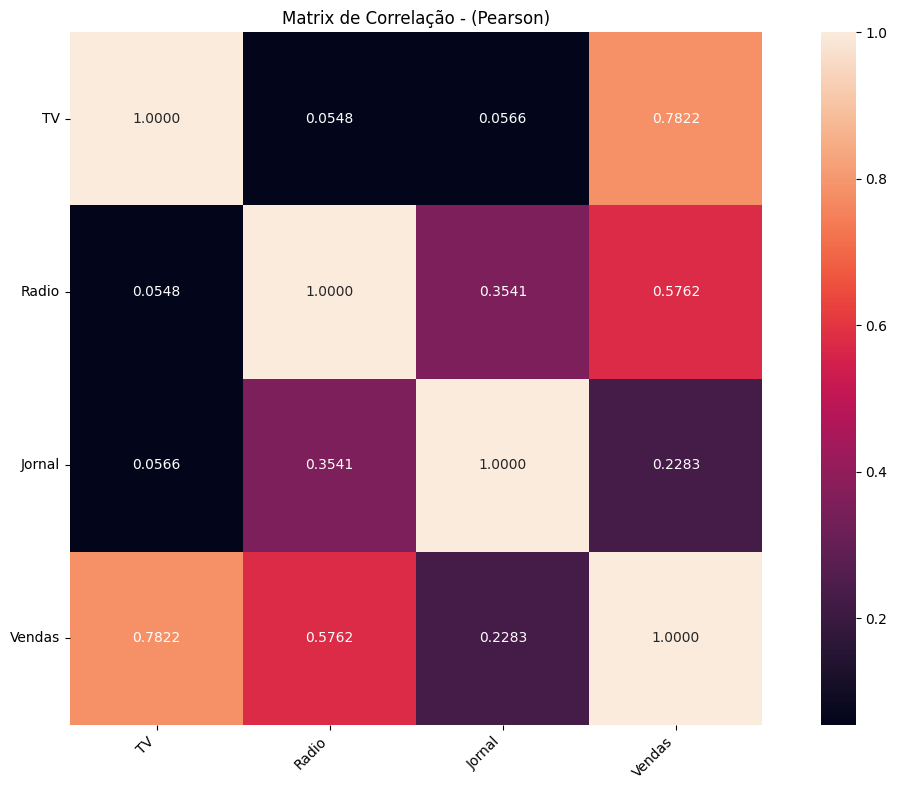

In [48]:
# Correlação: Calculo que mede a força e a direção do relacionamento linear entre duas variávies, variando entre -1 e 1.
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_pearson = df.corr(method='pearson')

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix_pearson, annot=True, fmt=".4f", cbar=True, square=True)
plt.title("Matrix de Correlação - (Pearson)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [44]:
correlation_matrix_pearson

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Jornal,0.056648,0.354104,1.000000,0.228299
Vendas,0.782224,0.576223,0.228299,1.000000


##### Interpretação por par de variáveis - Pearson
1. **TV e Vendas (0.782224)**  
   Existe uma **forte correlação positiva** entre os gastos em TV e as Vendas.  
   Isso sugere que aumentar o investimento em TV está associado a um aumento nas vendas.

2. **Radio e Vendas (0.576223)**  
   Existe uma **moderada correlação positiva** entre os gastos em Rádio e as Vendas.  
   Embora o impacto seja menor que o da TV, ainda assim há uma relação clara, indicando que o investimento em Rádio também contribui para o aumento das vendas.

3. **Jornal e Vendas (0.228299)**  
   Existe uma **fraca correlação positiva** entre os gastos em Jornal e as Vendas.  
   Isso indica que os gastos em Jornal têm pouco impacto nas vendas, pelo menos em termos de relação linear.

4. **TV e Radio (0.054809)**  
   Existe uma **correlação quase nula** entre os gastos em TV e Rádio.  
   Isso sugere que os investimentos em TV e Rádio não estão diretamente relacionados.

5. **TV e Jornal (0.056648)**  
   Existe uma **correlação quase nula** entre os gastos em TV e Jornal.  
   Isso indica que os gastos em TV e Jornal são independentes.

6. **Radio e Jornal (0.354104)**  
   Existe uma **correlação positiva fraca/moderada** entre os gastos em Rádio e Jornal.  
   Isso pode indicar que, em alguns casos, os investimentos em Rádio e Jornal aumentam juntos, mas a relação não é muito forte.


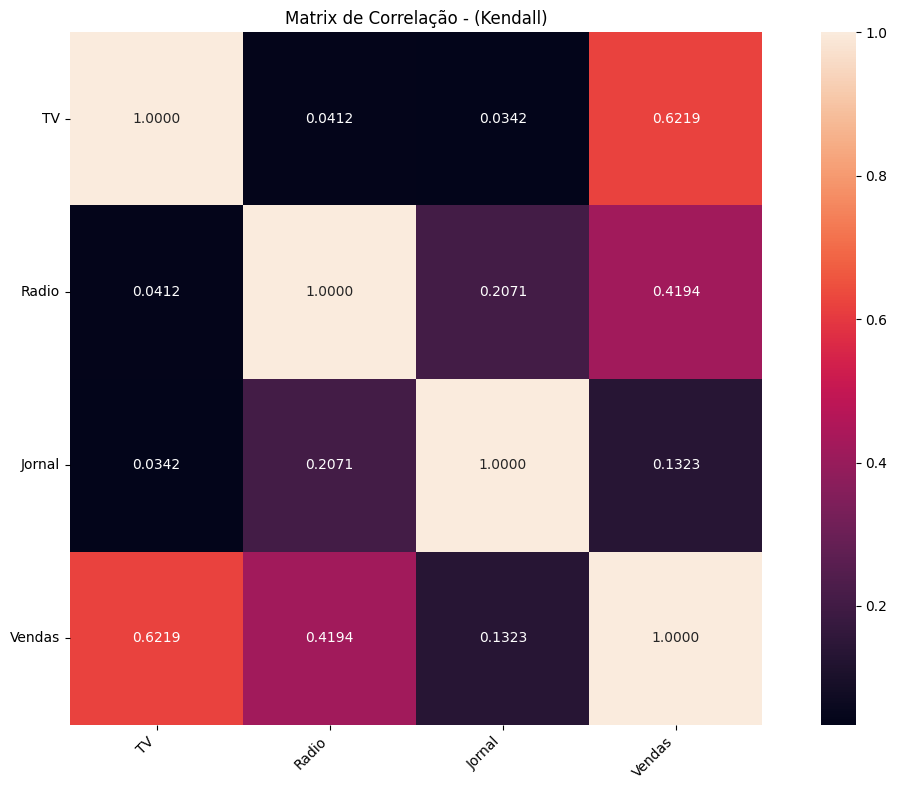

In [52]:
# Correlação: Calculo que mede a força e a direção do relacionamento linear entre duas variávies, variando entre -1 e 1
# - Próximo de 1: Forte relação de ordenação positiva.
# - **Próximo de 0:** Relação de ordenação muito fraca ou inexistente.
# - **Próximo de -1:** Forte relação de ordenação negativa.


import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix_kendall = df.corr(method='kendall')

plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix_kendall, annot=True, fmt=".4f", cbar=True, square=True)
plt.title("Matrix de Correlação - (Kendall)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
correlation_matrix_kendall

,TV,Radio,Jornal,Vendas
TV,1.000000,0.041202,0.034156,0.621946
Radio,0.041202,1.000000,0.207077,0.419447
Jornal,0.034156,0.207077,1.000000,0.132271
Vendas,0.621946,0.419447,0.132271,1.000000


##### Análise dos Resultados de Correlação de Kendall

1. **TV e Vendas (0.6219)**
A correlação positiva de **0.6219** indica uma relação de ordenação moderada a forte.  
Isso sugere que quando os gastos em TV aumentam, as vendas tendem a aumentar consistentemente, mesmo que não seja uma relação linear perfeita.

2. **Rádio e Vendas (0.4194)**
A correlação de **0.4194** é moderada, indicando que os gastos em Rádio também impactam as vendas, mas a relação é mais fraca em comparação com TV e Vendas.  
Há uma tendência positiva de ordenação, mas menos consistente.

3. **Jornal e Vendas (0.1323)**
A correlação positiva de **0.1323** é muito baixa, mostrando que os gastos em Jornal têm pouca influência sobre as vendas.  
Isso confirma que os gastos em Jornal não possuem uma relação de ordenação significativa com as Vendas.

4. **TV e Rádio (0.0412)**
A correlação próxima de **0** indica que os gastos em TV e Rádio são praticamente independentes em termos de ordenação.  
Isso sugere que os investimentos em TV e Rádio não têm uma relação consistente.

5. **TV e Jornal (0.0342)**
A correlação de **0.0342** é ainda menor, indicando que os gastos em TV e Jornal variam de maneira praticamente independente.  
Não há uma relação de ordenação significativa entre essas variáveis.

6. **Rádio e Jornal (0.2071)**
A correlação de **0.2071** é fraca, mas positiva, sugerindo que, em alguns casos, os gastos em Rádio e Jornal aumentam juntos.  
A relação é mais perceptível em comparação com TV e Jornal, mas ainda assim é relativamente baixa.



##### Conclusão Analise de Kendall x Pearson

Para todas as combinações de variáveis, a correlação de Kendall apresenta valores menores que a de Pearson,isso contecer pois, Kendall mede a força da relação baseada na ordenação dos dados, enquanto Pearson avalia a linearidade.

##### Menor valor absoluto geral:
- **Kendall:** TV e Jornal (0.0342)
- **Pearson:** TV e Rádio (0.0548)

Desta forma, podemos entender que TV e Jornal têm a menor relação de ordenação, enquanto TV e Rádio têm a menor relação linear.

#### 1.2.2 - Calculo de Covariância

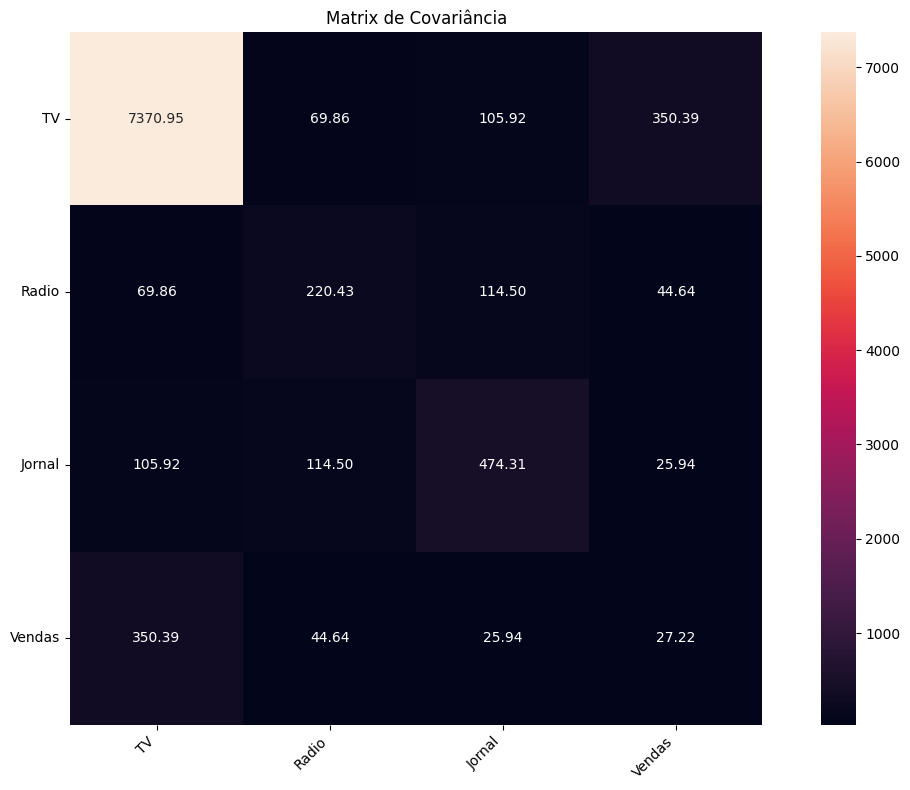

In [51]:
# O Calculo de covariância, mede a relação linear entre duas variáveis. É calculado como a médio dos produtos das diferenças entre cada valor e sua respectiva média.
covariance = df.cov()

plt.figure(figsize=(12,8))

sns.heatmap(covariance, annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Matrix de Covariância", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


##### Interpretação da Matriz de Covariância

1. **TV e Vendas (350.39)**  
   A covariância positiva relativamente alta indica que os gastos em TV tendem a variar na mesma direção que as Vendas.  
   Como a covariância não é padronizada, é difícil quantificar a força da relação apenas com este valor, mas ela confirma uma relação positiva.

2. **Radio e Vendas (44.63)**  
   A covariância entre os gastos em Rádio e as Vendas é positiva, mas significativamente menor do que entre TV e Vendas.  
   Isso indica que o Rádio também impacta as Vendas, mas o efeito é mais modesto em comparação com a TV.

3. **Jornal e Vendas (25.94)**  
   A covariância entre Jornal e Vendas é positiva, mas muito baixa.  
   Isso reforça que os gastos em Jornal têm pouca influência sobre as Vendas, pelo menos de forma linear.

4. **TV e Radio (69.86)**  
   A covariância positiva indica que, em alguns casos, os gastos em TV e Rádio aumentam juntos, mas o valor é pequeno, sugerindo uma relação fraca.

5. **TV e Jornal (105.92)**  
   Existe uma covariância positiva maior do que entre TV e Rádio, indicando que TV e Jornal podem variar juntos em maior grau.  
   No entanto, a relação ainda não é particularmente forte.

6. **Radio e Jornal (114.50)**  
   A covariância positiva sugere que Rádio e Jornal tendem a variar na mesma direção.  
   Este valor é maior do que Rádio com TV ou Vendas, indicando uma relação mais forte entre estas duas variáveis.


#### 1.3 - Modelo de Regressão

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = df[['TV', 'Radio', 'Jornal']] # Features
targets = df['Vendas'] # Target

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=42)


# Training model
model = LinearRegression()

model.fit(X_train, y_train)

# Predições
y_pred = model.predict(X_test)


##### 1.3.1 - Avaliação do Modelo de Regressão

In [71]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# O MSE mede a média dos quadrados dos erros, ou seja, a diferença entre os valores reais e as previsões feitas pelo modelo. Quanto menor o MSE, melhor o modelo
print(f' Avaliação de MSE: {mse}')

# O R² mede a proporção da variabilidade nos dados dependentes (Vendas) que é explicada pelas variáveis independentes (TV, Rádio, Jornal). 
# Ele varia de 0 a 1, onde 1 significa que o modelo explica 100% da variabilidade dos dados, e 0 significa que o modelo não explica nada da variabilidade.
print(f' Avaliação de R2 Explica : {r2} das variaveis independentes')

 Avaliação de MSE: 3.79679723671522
 Avaliação de R2 Explica : 0.8609466508230368 das variaveis independentes


##### Análise dos Resultados
- **MSE** de 3.80 sugere que o erro médio de previsão é de cerca de 3.80 unidades ao quadrado, que pela minha interpretação é um resultado razoável e aceitável.
- **R²** de 0.86 sugere que o modelo explica 86% da variabilidade nas vendas, o que é excelente e indica uma boa performance do modelo de regressão.

#### 1.4 - Análise de Residuos
1. Resíduos próximos de zero indicam uma boa previsão.
2. Resíduos grandes e negativos indicam que o modelo superestimou a previsão.
3. Resíduos grandes e positivos indicam que o modelo subestimou a previsão.
3. Distribuição dos resíduos: Idealmente, os resíduos devem ser distribuídos aleatoriamente em torno de zero (sem tendência sistemática). Se houver padrões, isso pode sugerir que o modelo não está capturando alguma variável importante ou existe uma relação não linear.



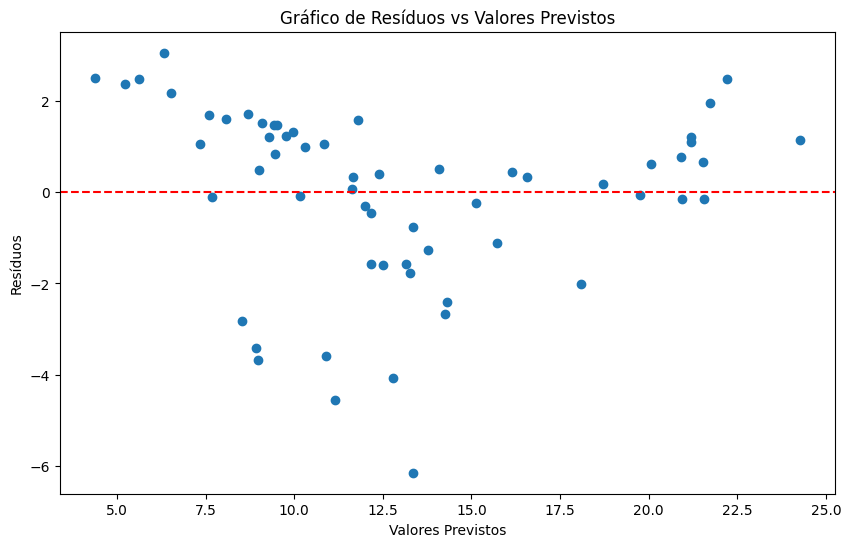

In [84]:
residuos = y_test - y_pred

# 1. Gráfico de dispersão: Resíduos vs. Valores Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Gráfico de Resíduos vs Valores Previstos")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.show()

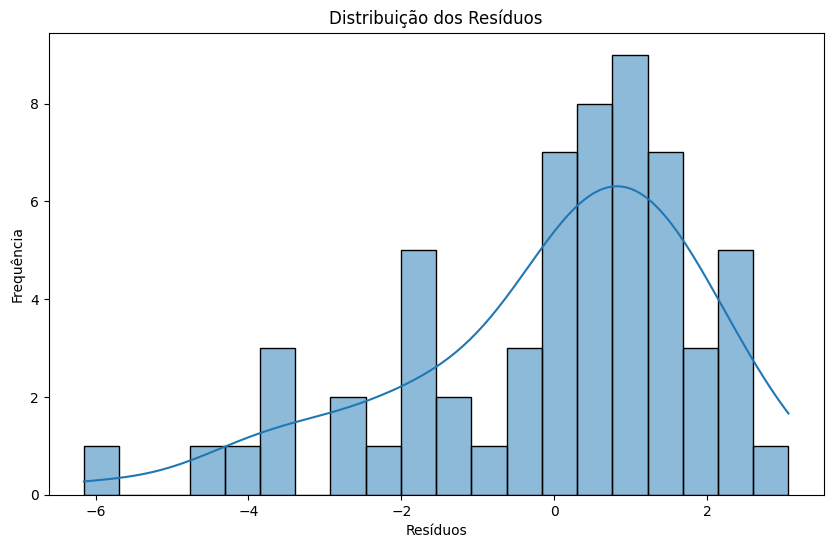

In [82]:
# 2. Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, bins=20)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")
plt.show()

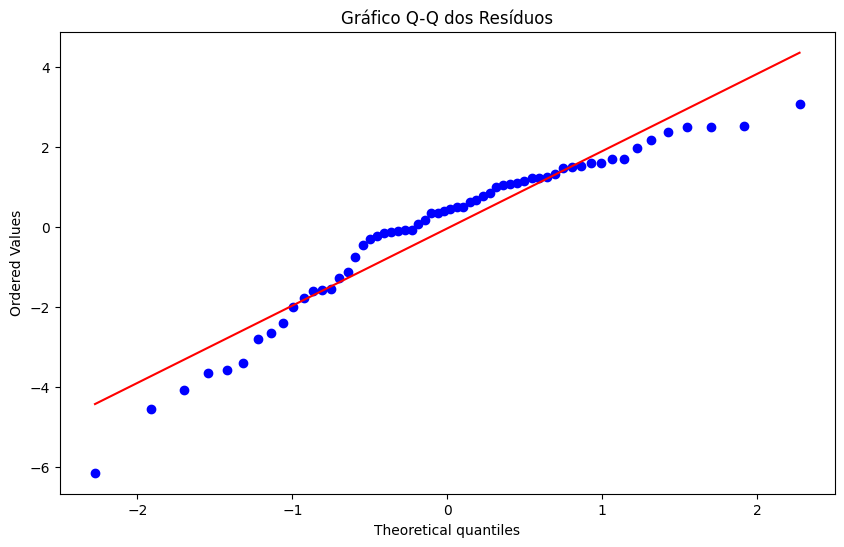

In [78]:
import scipy.stats as stats

# 3. Gráfico Q-Q dos resíduos
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Gráfico Q-Q dos Resíduos")
plt.show()

#### 1.5 - Análise de Multicolinearidade


In [92]:
# VIF (Variance Inflation Factor): O VIF mede o quanto a variabilidade de uma variável independente está sendo "inflacionada" devido à colinearidade com as outras variáveis independentes. 
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor


features_to_vif = add_constant(features)

vif_df = pd.DataFrame()
vif_df["Variables"] = features_to_vif.columns
vif_df["VIF"] = [variance_inflation_factor(features_to_vif.values, i) for i in range(features_to_vif.shape[1])]

print(vif_df)

  Variables       VIF
0     const  6.848900
1        TV  1.004611
2     Radio  1.144952
3    Jornal  1.145187


##### 1.5.1 - Interpretação dos Resultados de VIF

- **const (6.8489)**: O VIF para o termo constante é 6.85, o que indica uma certa multicolinearidade. Normalmente, o termo constante não é interpretado diretamente no contexto de multicolinearidade, mas é bom observar que um valor tão alto para ele sugere que as variáveis independentes podem ter uma correlação entre si.

- **TV (1.0046)**: O VIF para a variável "TV" é 1.0046, o que é muito baixo e indica que a variável "TV" não apresenta multicolinearidade significativa com as outras variáveis. Isso significa que ela pode ser considerada uma variável independente no modelo.

- **Rádio (1.1449)**: O VIF para a variável "Rádio" é 1.1449, também baixo. Isso sugere que "Rádio" tem uma relação muito fraca ou quase nula com as outras variáveis, o que significa que não há problemas significativos de multicolinearidade com ela.

- **Jornal (1.1452)**: O VIF para "Jornal" é muito próximo do de "Rádio" (1.1452), o que também indica uma relação fraca com as outras variáveis, sem multicolinearidade significativa.



/var/folders/bw/1sh_h7vd347d33_w29khkbbm0000gn/T/ipykernel_88719/3018121575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Variables', y='VIF', data=vif_df, palette='viridis', legend=False)


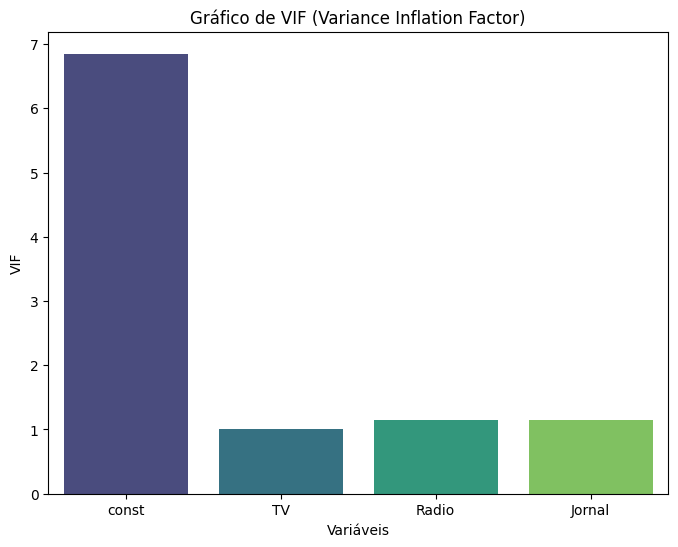

In [98]:

# Plotando o gráfico
plt.figure(figsize=(8, 6))
sns.barplot(x='Variables', y='VIF', data=vif_df, palette='viridis', legend=False)
plt.title("Gráfico de VIF (Variance Inflation Factor)")
plt.ylabel("VIF")
plt.xlabel("Variáveis")
plt.show()

#### 1.6 - Análise do Modelo
